## Data Cleaning

## Deal with Unwanted Observations

## Remove duplicates

In [1]:
# compatability with python 3
from __future__ import print_function
print('Print is ready to serve.')

# N dim array & data frame support
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt

#show plots in notebooks
%matplotlib inline

# seaborn for plotting as well
import seaborn as sns

Print is ready to serve.


In [2]:
df = pd.read_csv('../data/real_estate_data.csv')

In [4]:
# Remove duplicates
print(df.shape)
df.drop_duplicates()
print(df.shape)

(1883, 26)
(1883, 26)


In [7]:
# any unwanted data
df.columns

Index([u'tx_price', u'beds', u'baths', u'sqft', u'year_built', u'lot_size',
       u'property_type', u'exterior_walls', u'roof', u'basement',
       u'restaurants', u'groceries', u'nightlife', u'cafes', u'shopping',
       u'arts_entertainment', u'beauty_spas', u'active_life', u'median_age',
       u'married', u'college_grad', u'property_tax', u'insurance',
       u'median_school', u'num_schools', u'tx_year'],
      dtype='object')

## Fix structural errors

In [8]:
df.basement.unique()

array([ nan,   1.])

In [11]:
df.basement.fillna(0, inplace=True)

In [12]:
df.basement.unique()

array([ 0.,  1.])

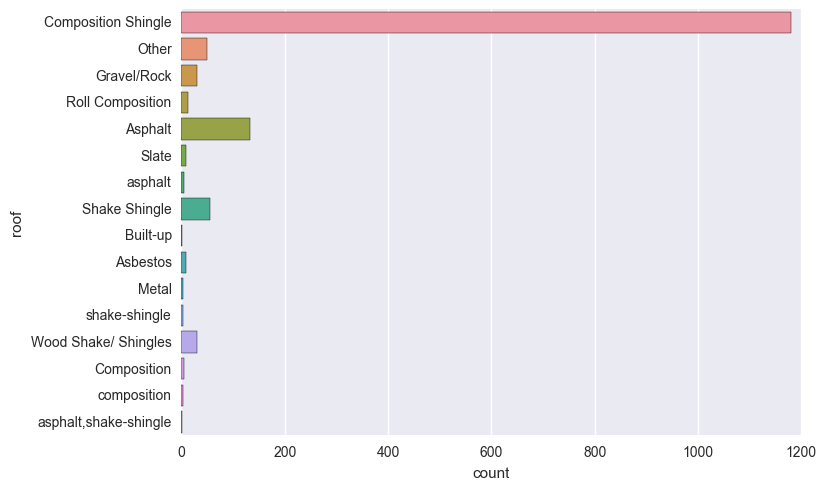

In [14]:
## check for typos
sns.countplot(y='roof', data=df)

In [15]:
# replace composition to Composition
df.roof.replace('composition', 'Composition', inplace=True)

In [16]:
df.roof.replace('asphalt', 'Asphalt', inplace=True)
df.roof.replace('shake-shingle', 'Shake Shingle', inplace=True)
df.roof.replace('asphalt,shake-shingle', 'Shake Shingle', inplace=True)

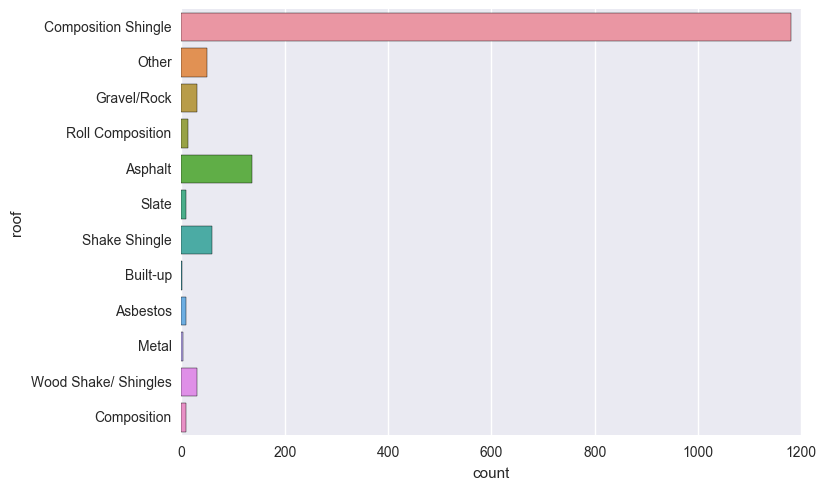

In [17]:
sns.countplot(y='roof', data=df)

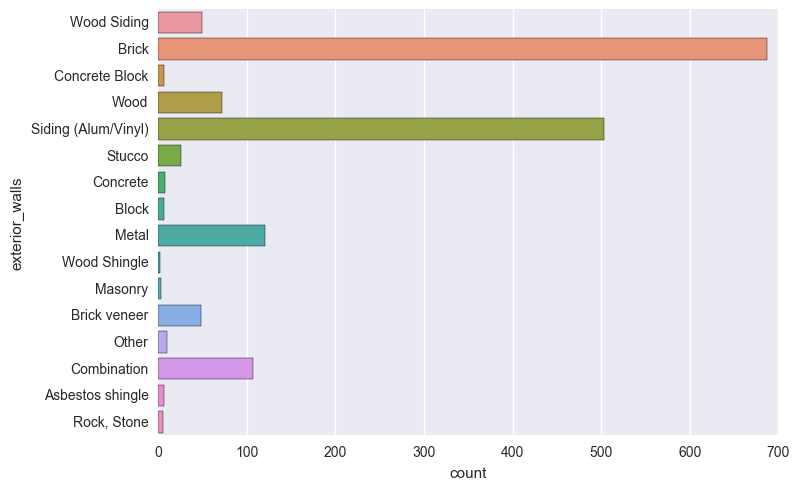

In [18]:
sns.countplot(y='exterior_walls', data=df)

In [19]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

In [20]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

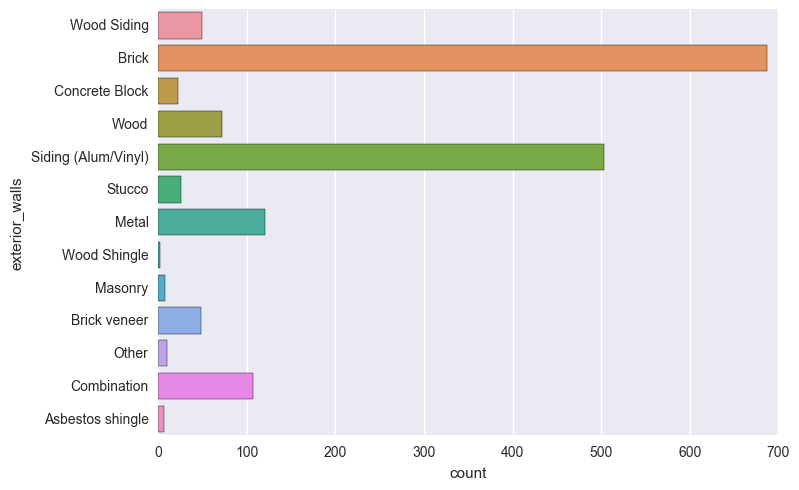

In [21]:
sns.countplot(y='exterior_walls', data=df)

## Remove unwanted Outliers

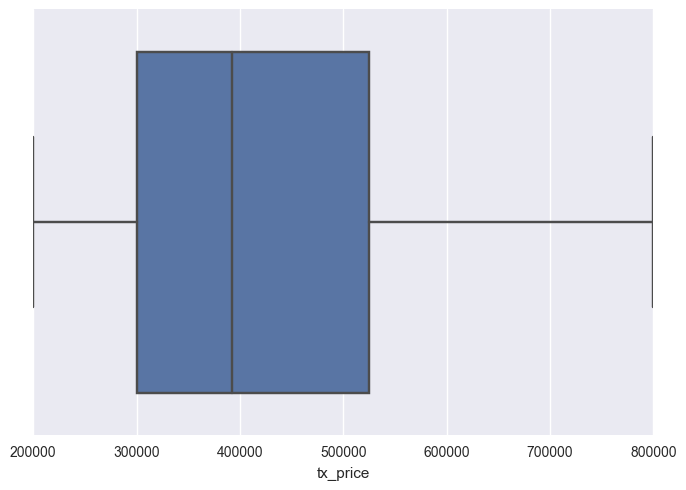

In [22]:
sns.boxplot(x='tx_price', data=df)

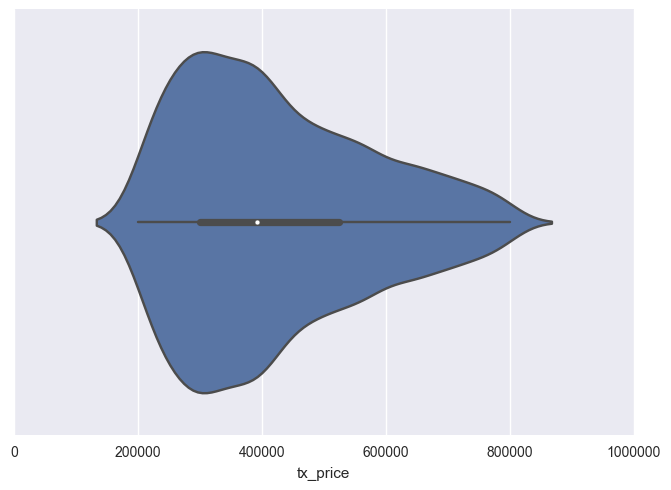

In [23]:
# Get the distribution as well using violin plot
sns.violinplot(df.tx_price)

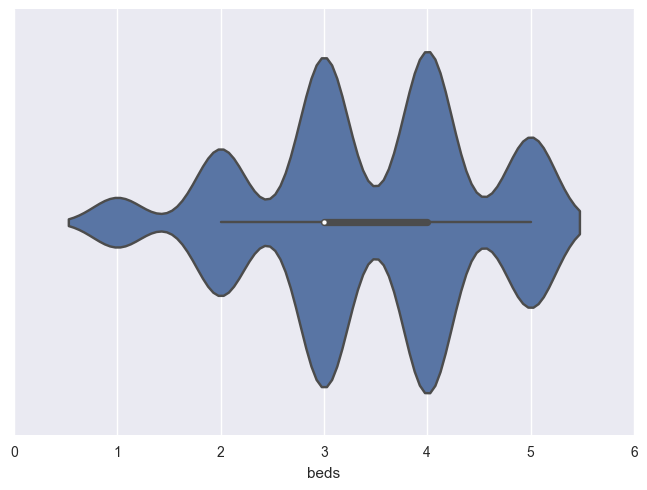

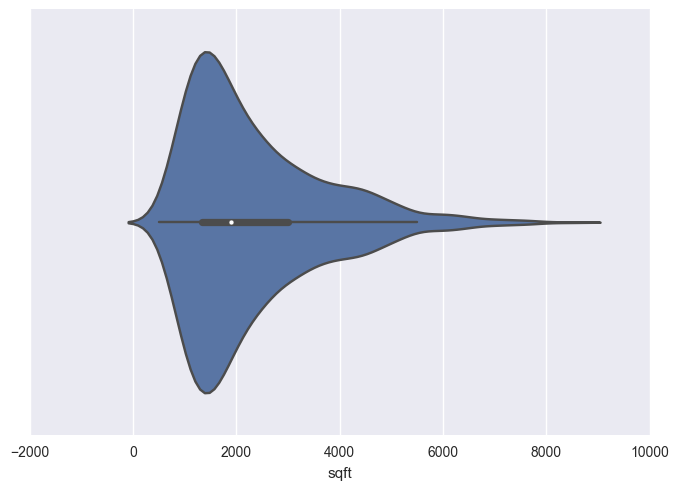

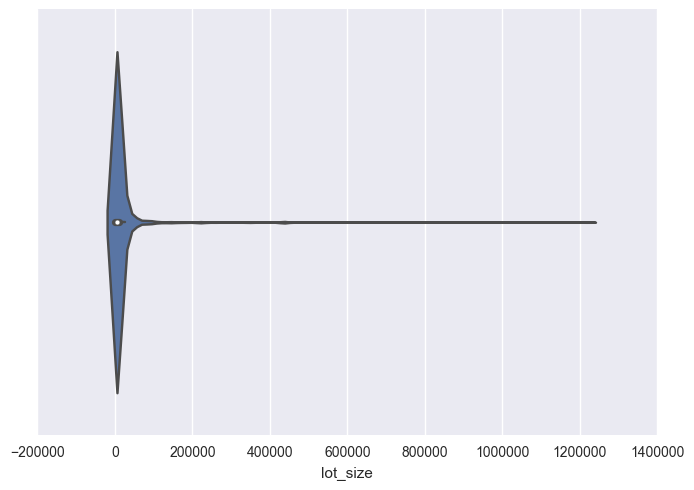

In [24]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft

sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

In [25]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head(5)

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [26]:
print(df.shape)
# Remove lot_size outliers

df = df[df.lot_size < 500000]
# print length of df
print(df.shape)

(1883, 26)
(1882, 26)


## Label Missing Categorical Data

In [27]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [28]:
# Fill missing categorical values

for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

## Flag and Fill Missing Numeric Data

In [30]:
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [31]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)